In [4]:
import shapely
import shapely.geos
import geopandas as gpd
import pandas as pd
import numpy
import geopandas as gpd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')


In [2]:
astoria = pd.read_csv('astoria.csv')
astoria.geom = astoria.geom.apply(lambda g: shapely.wkb.loads(g, hex=True))
astoria = gpd.GeoDataFrame(astoria)
astoria.geometry = astoria.geom

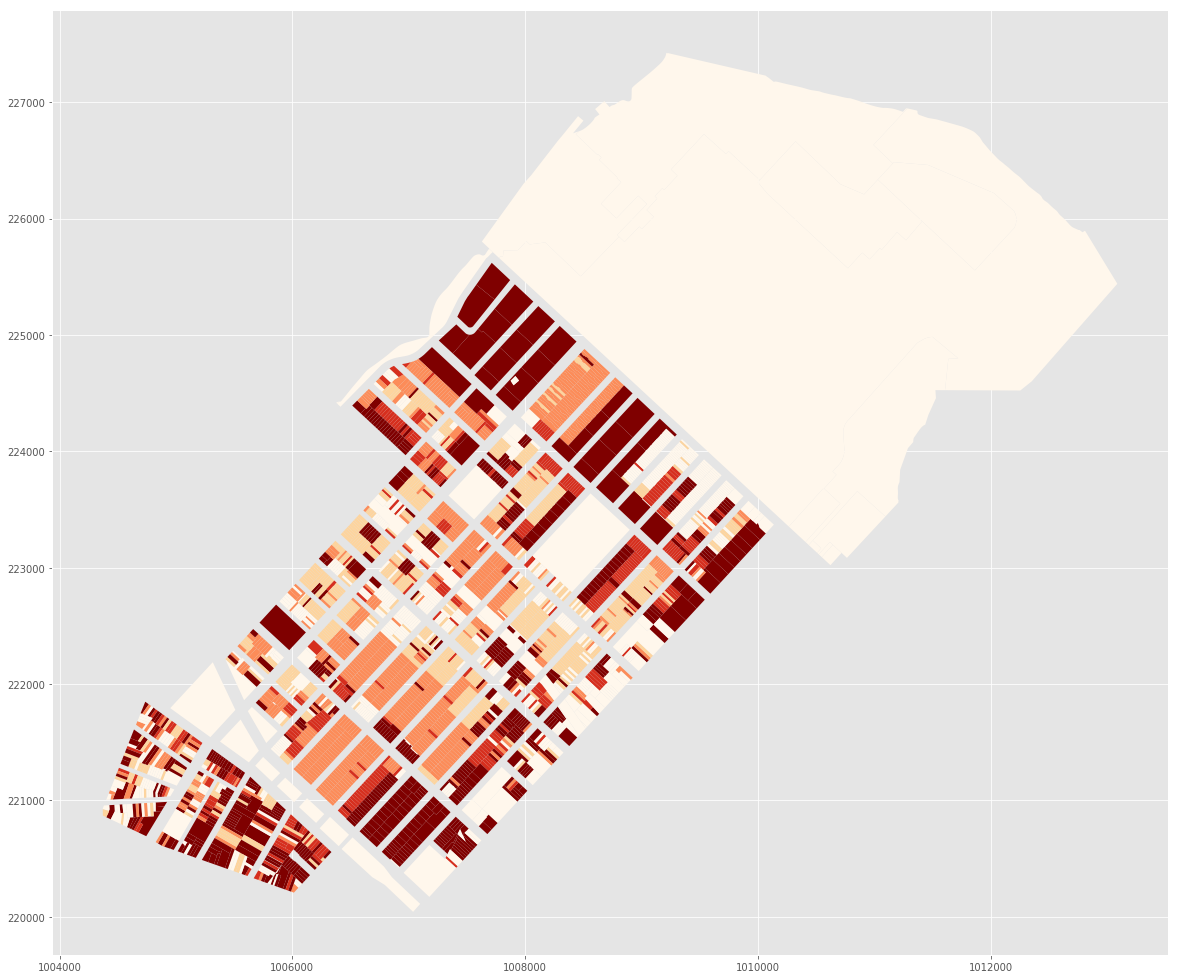

In [32]:
astoria.plot(figsize=(20,20), column= 'resarea', cmap='OrRd',scheme='quantiles')

In [23]:
astoria.columns

Index([u'id', u'geom', u'borough', u'block', u'lot', u'cd', u'ct2010',
       u'cb2010', u'schooldist', u'council', u'zipcode', u'firecomp',
       u'policeprct', u'healthcent', u'healtharea', u'sanitboro',
       u'sanitdistr', u'sanitsub', u'address', u'zonedist1', u'zonedist2',
       u'zonedist3', u'zonedist4', u'overlay1', u'overlay2', u'spdist1',
       u'spdist2', u'spdist3', u'ltdheight', u'splitzone', u'bldgclass',
       u'landuse', u'easements', u'ownertype', u'ownername', u'lotarea',
       u'bldgarea', u'comarea', u'resarea', u'officearea', u'retailarea',
       u'garagearea', u'strgearea', u'factryarea', u'otherarea', u'areasource',
       u'numbldgs', u'numfloors', u'unitsres', u'unitstotal', u'lotfront',
       u'lotdepth', u'bldgfront', u'bldgdepth', u'ext', u'proxcode',
       u'irrlotcode', u'lottype', u'bsmtcode', u'assessland', u'assesstot',
       u'exemptland', u'exempttot', u'yearbuilt', u'yearalter1', u'yearalter2',
       u'histdist', u'landmark', u'builtfar',